In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from function import PiecewiseFunction
from network import TreeNode
import numpy as np
import matplotlib.pyplot as plt

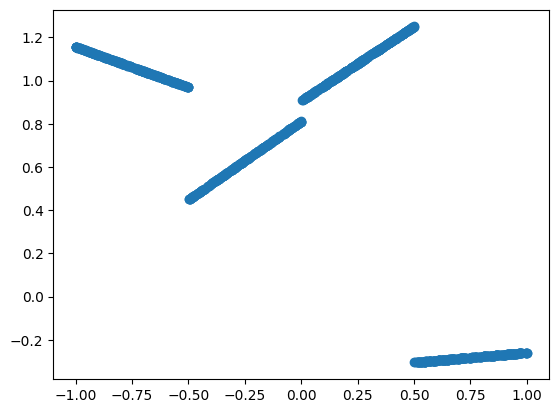

In [3]:
piecewise_func = PiecewiseFunction(lower_bound=-1, upper_bound=1, num_splits=4)

# Sample dataset
inputs = np.random.uniform(-1, 1, 1000)
outputs = np.array([piecewise_func(x) for x in inputs])

# Plot the dataset
plt.scatter(inputs, outputs)

In [4]:
from torch.utils.data import Dataset, DataLoader

# simple dataset given inputs and outputs
class SimpleDataset(Dataset):
    def __init__(self, inputs, outputs):
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        # convert to float32 and torch tensor
        return np.array([self.inputs[idx]]).astype(np.float32), np.array([self.outputs[idx]]).astype(np.float32)


In [5]:
dims = [1, 10, 10, 1]
temperature = 0.5

model = TreeNode(dims, temperature=temperature)
train_dataset = SimpleDataset(inputs, outputs)

In [6]:
from torch.optim import Adam
from torch.nn import MSELoss

# simple training loop
epochs = 250
batch_size = 64
lr = 1e-4
optimizer = Adam(model.parameters(), lr=lr)
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
loss_fn = MSELoss()
model.train()

for epoch in range(epochs):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        # loss = loss_fn(model(x), y)
        loss = model.expected_loss(x, x.clone(), y, loss_fn).mean()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch}, Loss {loss.item()}")




Epoch 0, Loss 0.6651386022567749
Epoch 1, Loss 0.6787861585617065
Epoch 2, Loss 0.6336458325386047
Epoch 3, Loss 0.5619062185287476
Epoch 4, Loss 0.5305112600326538
Epoch 5, Loss 0.5405353903770447
Epoch 6, Loss 0.5504887700080872
Epoch 7, Loss 0.4854682981967926
Epoch 8, Loss 0.5160465240478516
Epoch 9, Loss 0.46287602186203003
Epoch 10, Loss 0.38044846057891846
Epoch 11, Loss 0.44281548261642456
Epoch 12, Loss 0.36511877179145813
Epoch 13, Loss 0.38818734884262085
Epoch 14, Loss 0.3213171660900116
Epoch 15, Loss 0.4165422320365906
Epoch 16, Loss 0.28827789425849915
Epoch 17, Loss 0.3095938563346863
Epoch 18, Loss 0.26357534527778625
Epoch 19, Loss 0.21933241188526154
Epoch 20, Loss 0.23579268157482147
Epoch 21, Loss 0.222234845161438
Epoch 22, Loss 0.2297799289226532
Epoch 23, Loss 0.192132830619812
Epoch 24, Loss 0.20502856373786926
Epoch 25, Loss 0.19739091396331787
Epoch 26, Loss 0.14215241372585297
Epoch 27, Loss 0.1401357501745224
Epoch 28, Loss 0.12025676667690277
Epoch 29, Los

{'RR': 0, 'RL': 1, 'LL': 2, 'LR': 3}


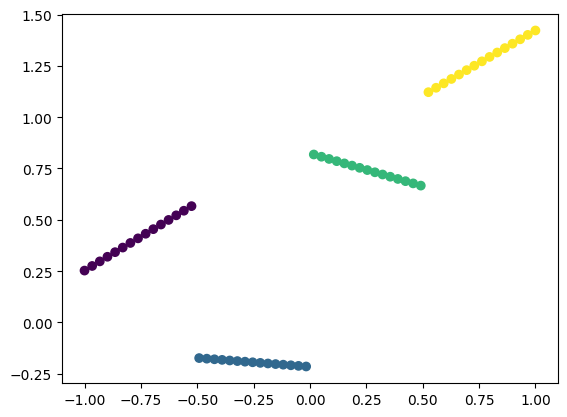

In [7]:
import torch
# eval the model on points linearly spaced in the interval

eval_inputs = np.linspace(-1, 1, 60)
model.eval()
ys = []
labels = []
label_to_int = {}
for x in eval_inputs:
    # y, label = model(torch.tensor([[x]]).float())
    x_tensor = torch.tensor([[x]]).float()
    y, label = model.inference(x_tensor, x_tensor.clone())
    ys.append(y.item())
    
    # map label string to color
    if label not in label_to_int:
        label_to_int[label] = len(label_to_int)
    labels.append(label_to_int[label])
    
print(label_to_int)
    
# plot, and make points with the same label the same color
plt.scatter(eval_inputs, ys, c=labels)
plt.show()

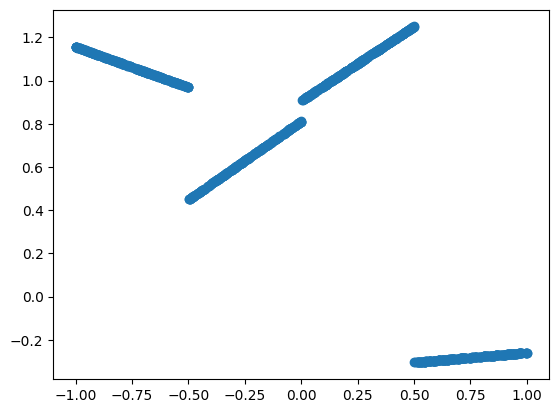

In [8]:
# Plot the dataset
plt.scatter(inputs, outputs)
plt.show()